In [1]:
# danh sách các thư viện cần thiết
required_libraries = [
    "numpy",
    "pandas",
    "matplotlib",
    "seaborn",
    "scikit-learn",
    "imblearn",
    "xgboost",
    "shap",
]


def install(package):
    """Install the package using pip in a Jupyter Notebook."""
    print(f"Installing {package}...")
    # Use the Jupyter magic command for installation
    get_ipython().system(f"pip install {package}")


def check_libraries(libraries):
    """Check if the libraries are installed and install them if necessary."""
    missing_libraries = []

    for library in libraries:
        try:
            __import__(library)
        except ImportError:
            missing_libraries.append(library)
        except Exception as e:
            # Captures other errors that may occur during import
            print(f"Error importing {library}: {e}")
            missing_libraries.append(library)

    if missing_libraries:
        print(f"The following libraries are missing: {', '.join(missing_libraries)}")
        print("Starting installation...")

        installation_success = True  # Flag to track installation success

        for library in missing_libraries:
            try:
                install(library)
                print(f"{library} installed successfully.")
            except Exception as e:
                print(f"Failed to install {library}: {e}")
                installation_success = False  # Mark as failed if there was an error

        # Check again if the libraries were installed
        for library in missing_libraries:
            try:
                __import__(library)
            except ImportError:
                print(f"Error: {library} was not installed correctly.")
                installation_success = False  # Mark as failed if still missing

        # Final message based on installation success
        if installation_success:
            print("All libraries were installed successfully.")
        else:
            print("Some libraries were not installed correctly.")
    else:
        print("All libraries are already installed.")


if __name__ == "__main__":
    check_libraries(required_libraries)

The following libraries are missing: scikit-learn
Starting installation...
Installing scikit-learn...
scikit-learn installed successfully.Requirement already satisfied: scikit-learn in d:\appdata\python311\lib\site-packages (1.5.2)

Error: scikit-learn was not installed correctly.
Some libraries were not installed correctly.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Import necessary libraries for data manipulation and analysis
import pandas as pd
import numpy as np
import warnings

# Importing libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Importing libraries for machine learning
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_curve,
    auc,
    accuracy_score,
    f1_score,
)
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import shap

nếu lỗi "Numba needs NumPy 2.0 or less. Got NumPy 2.1" thì xóa cái import sharp đi


In [3]:
warnings.filterwarnings("ignore")

# Paths to the CSV files
path_data = "healthcare-dataset-stroke-data.csv"

# Reading the CSV files
df = pd.read_csv(path_data)

In [4]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [5]:
# Display the first few rows of the dataset along with additional information
print("Stroke Data:")
print(df.head())  # Display the first few rows

# Display dataset information
print("\nDataset Information:")
print(df.info())  # Display information about the dataset

# Display summary statistics
print("\nSummary Statistics:")
print(df.describe())  # Display descriptive statistics for numerical columns

# Display the count of missing values in each column
print("\nMissing Values Count:")
print(df.isnull().sum())  # Count of missing values in each column

# Display the column names
print("\nColumn Names:")
print(df.columns.tolist())  # List of column names

Stroke Data:
      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  

Dataset Information:
<class 'pandas.core.f

In [6]:
# Check for duplicate values in the 'id' column
# duplicated() returns a boolean Series indicating if each row is a duplicate
# any() checks if there are any True values in the Series
has_duplicates = df["id"].duplicated().any()

# If there are no duplicates, we assume this column is an ID column
if not has_duplicates:
    print("The 'id' column has no duplicates. Removing it from the DataFrame.")
    # Drop the 'id' column from the DataFrame
    df.drop(columns=["id"], inplace=True)
else:
    print("The 'id' column has duplicates and will not be removed.")

The 'id' column has no duplicates. Removing it from the DataFrame.


In [7]:
# Using shape to check the dimensions of the combined DataFrame
print("\nShape of Combined Data:", df.shape)


Shape of Combined Data: (5110, 11)


## chuẩn bị dữ liệu <a name="chuẩn bị dữ liệu"></a>

Trước khi lập mô hình, chúng ta cần chuẩn bị dữ liệu. Điều này bao gồm xử lý các giá trị bị thiếu, mã hóa các biến phân loại và chia tập dữ liệu thành các tập huấn luyện và thử nghiệm.


In [8]:
def fit_transform_custom(data):
    result = dict()
    value_counts = data.value_counts()
    for i in range(len(value_counts)):
        result[value_counts.index[i]] = i
    return data.map(result)

def train_test_split_custom(X, y, test_size=0.25, random_state=None):
    # Kiểm tra xem X và y có cùng số lượng mẫu hay không
    if len(X) != len(y):
        raise ValueError("X và y phải có cùng số lượng mẫu")

    # Đặt seed cho random để có thể tái lập ngẫu nhiên (nếu có random_state)
    # if random_state is not None:
    #     np.random.seed(random_state)

    # Tạo danh sách các chỉ số và xáo trộn chúng
    indices = np.arange(len(X))
    # np.random.shuffle(indices)

    # Xác định số lượng mẫu cho tập kiểm tra
    test_size = int(len(X) * test_size)

    # Chia chỉ số thành hai tập: kiểm tra và huấn luyện
    test_indices = indices[:test_size]
    train_indices = indices[test_size:]

    # Chia dữ liệu X và y thành hai tập tương ứng
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    return X_train, X_test, y_train, y_test


In [9]:
# Check the data types of each column in the DataFrame
print("Data Types of Each Column:")
print(df.dtypes)

# For a more organized view, you can use the .info() method
print("\nDetailed Information about the DataFrame:")
print(df.info())

Data Types of Each Column:
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

Detailed Information about the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi  

In [10]:
df["avg_glucose_level"].value_counts

<bound method IndexOpsMixin.value_counts of 0       228.69
1       202.21
2       105.92
3       171.23
4       174.12
         ...  
5105     83.75
5106    125.20
5107     82.99
5108    166.29
5109     85.28
Name: avg_glucose_level, Length: 5110, dtype: float64>

In [11]:
# Normalize the 'gender' column by stripping whitespace and converting to lowercase
df["gender"] = df["gender"].str.strip().str.lower()

# Remove the observation 'other' from the 'gender' column (now in lowercase)
df = df[df["gender"] != "other"]

# Check the count of unique values after removal
print("\nUnique Values in 'gender' after removal:")
print(df["gender"].value_counts())


Unique Values in 'gender' after removal:
gender
female    2994
male      2115
Name: count, dtype: int64


In [12]:
df["gender"].value_counts()


gender
female    2994
male      2115
Name: count, dtype: int64

In [13]:
df["ever_married"].value_counts()


ever_married
Yes    3353
No     1756
Name: count, dtype: int64

In [14]:
df["work_type"].value_counts()


work_type
Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

In [15]:
df["stroke"].value_counts()


stroke
0    4860
1     249
Name: count, dtype: int64

In [16]:
df["Residence_type"].value_counts()


Residence_type
Urban    2596
Rural    2513
Name: count, dtype: int64

In [17]:
df["smoking_status"].value_counts()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: count, dtype: int64

In [18]:
for column in df.select_dtypes(include=['object']).columns: 
    df[column] = fit_transform_custom(df[column])
    # print(column)

In [19]:
df["gender"] = fit_transform_custom(df["gender"])
df["ever_married"] = fit_transform_custom(df["ever_married"])
df["work_type"] = fit_transform_custom(df["work_type"])
df["Residence_type"] = fit_transform_custom(df["work_type"])
df["smoking_status"] = fit_transform_custom(df["work_type"])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5109 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   int64  
 1   age                5109 non-null   float64
 2   hypertension       5109 non-null   int64  
 3   heart_disease      5109 non-null   int64  
 4   ever_married       5109 non-null   int64  
 5   work_type          5109 non-null   int64  
 6   Residence_type     5109 non-null   int64  
 7   avg_glucose_level  5109 non-null   float64
 8   bmi                4908 non-null   float64
 9   smoking_status     5109 non-null   int64  
 10  stroke             5109 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 479.0 KB


In [21]:
# Check the amount of missing values in the columns
print("\nMissing Values in Each Column:")
print(df.isnull().sum())


Missing Values in Each Column:
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [22]:
# First, let's drop missing values for the plots
bmi_data = df['bmi'].dropna()

In [23]:
# Calculate the correlation between 'stroke' and 'bmi' (There are 201 missing values)
correlation = df['stroke'].corr(df['bmi'])
print(f"Correlation between stroke and BMI: {correlation:.2f}")

Correlation between stroke and BMI: 0.04


In [24]:
# Filling missing values in the BMI column with the median
df['bmi'].fillna(df['bmi'].median(), inplace=True)

# Displaying the updated DataFrame to confirm the changes made
print("Updated DataFrame after filling missing BMI values with the median:")
print(df.head())  # Displaying the first few rows of the updated DataFrame

Updated DataFrame after filling missing BMI values with the median:
   gender   age  hypertension  heart_disease  ever_married  work_type  \
0       1  67.0             0              1             0          0   
1       0  61.0             0              0             0          1   
2       1  80.0             0              1             0          0   
3       0  49.0             0              0             0          0   
4       0  79.0             1              0             0          1   

   Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
0               0             228.69  36.6               0       1  
1               1             202.21  28.1               1       1  
2               0             105.92  32.5               0       1  
3               0             171.23  34.4               0       1  
4               1             174.12  24.0               1       1  


## Mô hình hóa <a name="modeling"></a>
Trong phần này, chúng ta sẽ xây dựng các mô hình học máy để dự đoán khả năng xảy ra đột quỵ dựa trên các đặc điểm và chỉ số sức khỏe khác nhau của bệnh nhân. Chúng ta sẽ chọn các thuật toán phù hợp và điều chỉnh chúng cho phù hợp với dữ liệu đào tạo của mình, nhằm xác định các yếu tố rủi ro chính và cải thiện các chiến lược phát hiện sớm.

In [25]:
# Prepare the data
import math
X = df.drop(columns=['stroke'], axis=1)  # Remove the target variable from the DataFrame
y = df['stroke']  # Target variable

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1,stratify = y, random_state=None)
# Assuming you have these variables already defined in your code
# X_test = np.array(X_test)
# X_train = np.array(X_train)
# y_train = np.array(y_train)
# y_test = np.array(y_test)
print("Shape of x_train:", X_train.shape)
print("Shape of x_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of x_train: (4598, 10)
Shape of x_test: (511, 10)
Shape of y_train: (4598,)
Shape of y_test: (511,)


In [29]:
y_train

array([0, 0, 0, ..., 0, 1, 0])

In [49]:
import numpy as np
from collections import Counter

class KNNModified:
    def __init__(self, k=3, distance_metric='euclidean'):
        """
        Khởi tạo mô hình KNN.
        
        Args:
        - k (int): Số lượng hàng xóm gần nhất.
        - distance_metric (str): Loại khoảng cách sử dụng ('euclidean' hoặc 'manhattan').
        """
        self.k = k
        self.distance_metric = distance_metric
        self.X_train = None
        self.y_train = None

    def fit(self, X, y):
        """
        Huấn luyện mô hình bằng cách lưu trữ dữ liệu huấn luyện.
        
        Args:
        - X (np.ndarray): Dữ liệu đầu vào có kích thước (n_samples, n_features).
        - y (np.ndarray): Nhãn tương ứng có kích thước (n_samples,).
        """
        self.X_train = X
        self.y_train = y

    def _compute_distance(self, x1, x2):
        """
        Tính khoảng cách giữa hai điểm x1 và x2.
        
        Args:
        - x1 (np.ndarray): Điểm thứ nhất.
        - x2 (np.ndarray): Điểm thứ hai.
        
        Returns:
        - float: Khoảng cách giữa hai điểm.
        """
        if self.distance_metric == 'euclidean':
            return np.sqrt(np.sum((x1 - x2) ** 2))
        elif self.distance_metric == 'manhattan':
            return np.sum(np.abs(x1 - x2))
        else:
            raise ValueError("Khoảng cách không được hỗ trợ! Chọn 'euclidean' hoặc 'manhattan'.")

    def _get_neighbors(self, x):
        """
        Tìm k hàng xóm gần nhất của điểm x.
        
        Args:
        - x (np.ndarray): Điểm cần tìm hàng xóm.
        
        Returns:
        - list: Danh sách chỉ số của k hàng xóm gần nhất.
        """
        distances = [self._compute_distance(x, x_train) for x_train in self.X_train]
        neighbors_idx = np.argsort(distances)[:self.k]  # Chọn k điểm gần nhất
        return neighbors_idx

    def predict(self, X):
        """
        Dự đoán nhãn cho dữ liệu mới.
        
        Args:
        - X (np.ndarray): Dữ liệu đầu vào cần dự đoán, kích thước (n_samples, n_features).
        
        Returns:
        - np.ndarray: Nhãn dự đoán cho dữ liệu đầu vào, kích thước (n_samples,).
        """
        predictions = []
        for x in X:
            neighbors_idx = self._get_neighbors(x)
            neighbor_labels = self.y_train[neighbors_idx]
            most_common = Counter(neighbor_labels).most_common(1)
            predictions.append(most_common[0][0])
        return np.array(predictions)

    def score(self, X, y):
        """
        Tính độ chính xác của mô hình trên dữ liệu kiểm tra.
        
        Args:
        - X (np.ndarray): Dữ liệu đầu vào kiểm tra.
        - y (np.ndarray): Nhãn thực sự của dữ liệu kiểm tra.
        
        Returns:
        - float: Độ chính xác của mô hình.
        """
        y_pred = self.predict(X)
        return np.mean(y_pred == y)


In [30]:
def knn_modified(X_train,y_train,X_test,k):
    pred = []
    for j in range(len(X_test)):
        distance = []
        min_dist = math.inf
        for i in range(len(X_train)):
            eulidean_distance = np.sqrt(np.sum((X_test[j,] - X_train[i,])**2))
            if eulidean_distance < min_dist:
                distance.append((eulidean_distance, i))
            else:
                continue
        
        #Sort the list by distance
        distance.sort()
    
        #Get the row index of its nearest neighbour
        neighbours = []
        
        for j in range(k):
            neighbours.append(distance[j][1])
        
        #Append the actual target in a list
        target = []
        for l in range(k):
            target.append(np.array(y_train)[neighbours[l]][0])

        #Create a function for counting
        count = {}
        for t in target:
            count[t] = count.get(t,0) + 1
        
        #Create a list with (value, key) pair 
        pairs = []
        for key in count:
            pairs.append((count[key], key))
        
        #Sort the pair and get the most occurring word
        pairs.sort(reverse=True)
        if k%2 == 0:
            even = []
            for i in range(0,len(pairs)):
                if pairs[0][0] == pairs[i][0]:
                    even.append(pairs[i][1])
            #print('Arranging in decreasing order: ',even)
            for j in neighbours:
                if y_train[j][0] in even:
                    pred.append(y_train[j][0])
                    #print('Value with the least distance classifies: ',y_train[j][0])
                    #print('Picking classifier based on least distance: ',y_train[j][0])
                    break
                else:
                    pred.append(pairs[0][1])
                    break
        else:
            pred.append(pairs[0][1])
        
    return(pred)

In [ ]:
n = 10
pred = knn_modified(X_train, y_train, X_test, k=n)

In [ ]:
knn = KNNModified(k=4)
knn.fit(X_train, y_train)

# Predict labels for test data
predictions = knn.predict(X_test)
print(predictions)

In [ ]:
print(y_test)

In [27]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,0,0,0,228.69,36.6,0,1
1,0,61.0,0,0,0,1,1,202.21,28.1,1,1
2,1,80.0,0,1,0,0,0,105.92,32.5,0,1
3,0,49.0,0,0,0,0,0,171.23,34.4,0,1
4,0,79.0,1,0,0,1,1,174.12,24.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,0,0,0,83.75,28.1,0,0
5106,0,81.0,0,0,0,1,1,125.20,40.0,1,0
5107,0,35.0,0,0,0,1,1,82.99,30.6,1,0
5108,1,51.0,0,0,0,0,0,166.29,25.6,0,0


In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV


In [ ]:
class DecisionTreeClassifierCustom:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.tree = None

    def gini(self, y):
        """Tính chỉ số Gini impurity"""
        classes, counts = np.unique(y, return_counts=True)
        p = counts / counts.sum()
        return 1 - np.sum(p**2)

    def split(self, X, y, feature_index, threshold):
        """Chia dữ liệu thành hai tập dựa trên giá trị threshold"""
        left_idx = X[:, feature_index] <= threshold
        right_idx = X[:, feature_index] > threshold
        return X[left_idx], X[right_idx], y[left_idx], y[right_idx]

    def best_split(self, X, y):
        """Tìm thuộc tính và giá trị chia tốt nhất"""
        best_feature = None
        best_threshold = None
        best_gini = float('inf')
        best_splits = None

        for feature_index in range(X.shape[1]):
            thresholds = np.unique(X[:, feature_index])
            for threshold in thresholds:
                X_left, X_right, y_left, y_right = self.split(X, y, feature_index, threshold)
                if len(y_left) == 0 or len(y_right) == 0:
                    continue

                # Tính chỉ số Gini sau khi chia
                gini_left = self.gini(y_left)
                gini_right = self.gini(y_right)
                weighted_gini = (len(y_left) * gini_left + len(y_right) * gini_right) / len(y)

                # Cập nhật giá trị tốt nhất
                if weighted_gini < best_gini:
                    best_gini = weighted_gini
                    best_feature = feature_index
                    best_threshold = threshold
                    best_splits = (X_left, X_right, y_left, y_right)

        return best_feature, best_threshold, best_splits

    def build_tree(self, X, y, depth=0):
        """Đệ quy xây dựng cây"""
        # Điều kiện dừng
        if len(np.unique(y)) == 1:  # Nếu tất cả các nhãn giống nhau
            return {'label': y[0]}
        if self.max_depth is not None and depth >= self.max_depth:
            # Trả về nhãn phổ biến nhất nếu đạt độ sâu tối đa
            return {'label': np.bincount(y).argmax()}

        # Tìm cách chia tốt nhất
        feature, threshold, splits = self.best_split(X, y)
        if splits is None:  # Nếu không thể chia được
            return {'label': np.bincount(y).argmax()}

        X_left, X_right, y_left, y_right = splits

        # Đệ quy xây dựng cây con
        left_subtree = self.build_tree(X_left, y_left, depth + 1)
        right_subtree = self.build_tree(X_right, y_right, depth + 1)

        return {
            'feature': feature,
            'threshold': threshold,
            'left': left_subtree,
            'right': right_subtree
        }

    def fit(self, X, y):
        """Huấn luyện mô hình"""
        self.tree = self.build_tree(X, y)

    def predict_sample(self, x, tree):
        """Dự đoán cho một mẫu dữ liệu"""
        if 'label' in tree:  # Nếu nút là lá
            return tree['label']
        if x[tree['feature']] <= tree['threshold']:
            return self.predict_sample(x, tree['left'])
        else:
            return self.predict_sample(x, tree['right'])

    def predict(self, X):
        """Dự đoán cho tập dữ liệu"""
        return np.array([self.predict_sample(x, self.tree) for x in X])
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

def plot_tree(tree, depth=0, pos=(0, 0), parent_pos=None, ax=None, width_scale=4, depth_scale=4):
    """
    Trực quan hóa cây quyết định.
    
    Args:
    - tree: Cây quyết định dưới dạng dictionary (từ lớp DecisionTreeClassifier).
    - depth: Độ sâu hiện tại (dùng cho đệ quy).
    - pos: Vị trí của nút hiện tại (x, y).
    - parent_pos: Vị trí của nút cha (nếu có).
    - ax: Trục matplotlib (được truyền qua các bước đệ quy).
    - width_scale: Hệ số tỷ lệ ngang giữa các nút.
    - depth_scale: Hệ số tỷ lệ dọc giữa các lớp.
    """
    if ax is None:
        fig, ax = plt.subplots(figsize=(20, 10))
        ax.set_xlim(-10, 10)
        ax.set_ylim(-depth_scale * 10, 1)
        ax.axis('off')

    x, y = pos

    if 'label' in tree:  # Nếu là nút lá
        ax.text(x, y, f"Label: {tree['label']}", ha='center', va='center', 
                bbox=dict(boxstyle="round", facecolor="lightgreen", edgecolor="black"))
    else:  # Nếu là nút quyết định
        text = f"Feature {tree['feature']}\n<= {tree['threshold']:.2f}"
        ax.text(x, y, text, ha='center', va='center', 
                bbox=dict(boxstyle="round", facecolor="lightblue", edgecolor="black"))

        # Tạo các nút con
        left_x = x - width_scale / (depth + 1)
        right_x = x + width_scale / (depth + 1)
        child_y = y - depth_scale

        # Vẽ đường nối
        ax.plot([x, left_x], [y, child_y], 'k-')
        ax.plot([x, right_x], [y, child_y], 'k-')

        # Đệ quy vẽ các cây con
        plot_tree(tree['left'], depth + 1, pos=(left_x, child_y), parent_pos=pos, ax=ax, 
                  width_scale=width_scale, depth_scale=depth_scale)
        plot_tree(tree['right'], depth + 1, pos=(right_x, child_y), parent_pos=pos, ax=ax, 
                  width_scale=width_scale, depth_scale=depth_scale)

    if parent_pos is None:  # Lần đầu gọi hàm
        plt.show()


In [35]:
print(np.array(y_test))

[0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

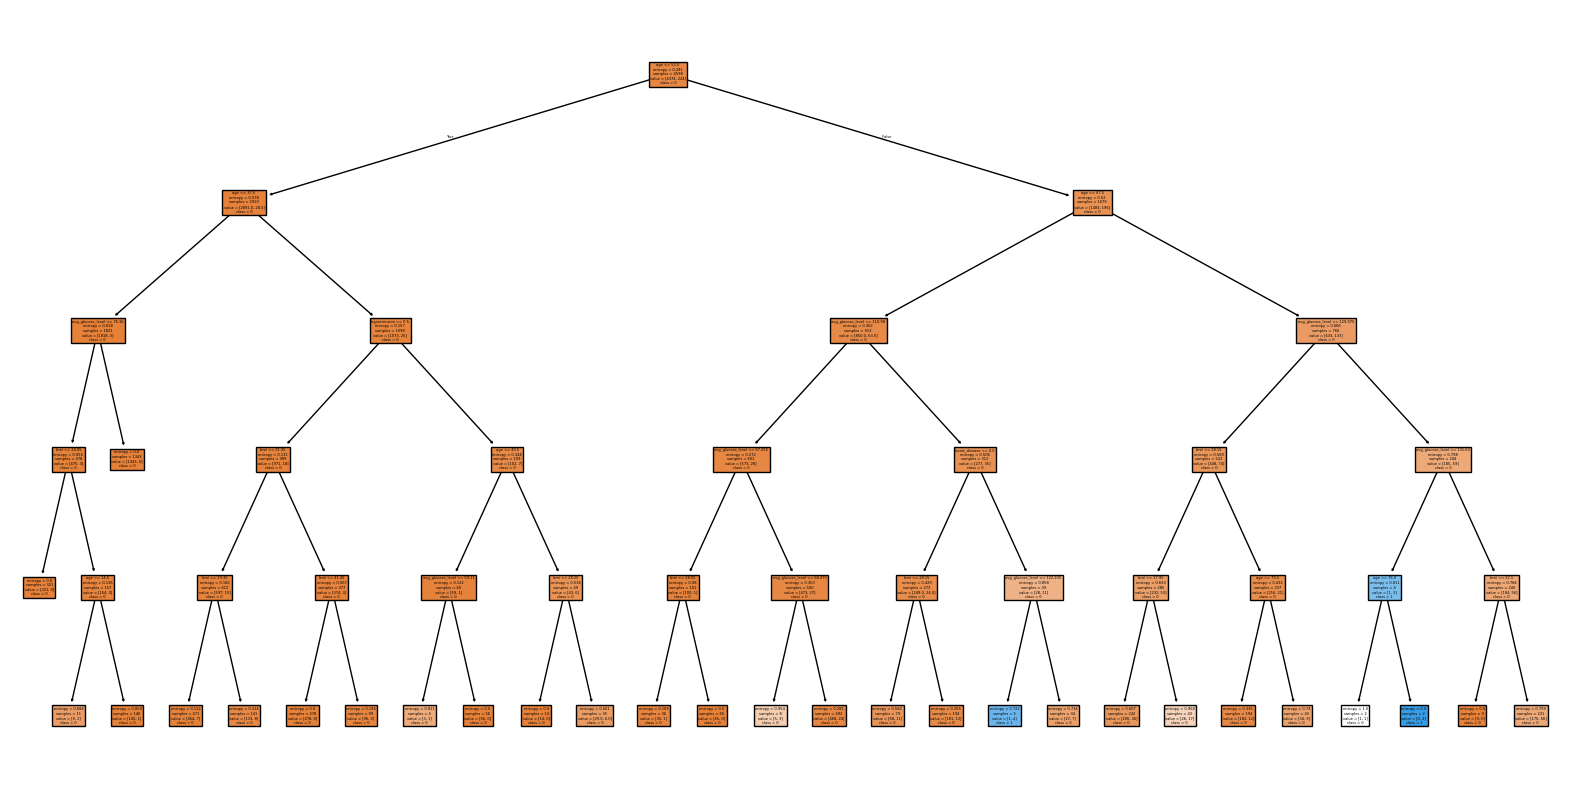

In [ ]:
# Ví dụ sử dụng
if __name__ == "__main__":
    parameter_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    }
    # Tạo và huấn luyện cây quyết định tùy chỉnh 
    clf = DecisionTreeClassifier()
    grid_search = GridSearchCV(clf, parameter_grid, cv=10, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    best_estimator = grid_search.best_estimator_
    # Dự đoán
    y_pred = best_estimator.predict(X_test)
    print(y_pred)
    print(y_test)

    # Cây quyết định được xây dựng
    # print("Cây quyết định:", clf)
    # plot_tree(clf)
    plt.figure(figsize=(20, 10))
    plot_tree(best_estimator, filled=True, feature_names=X.columns, class_names=np.unique(y).astype(str))
    plt.show()